In [1]:
## Reload the modules each time there are modified
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from src.utils import print_loading
from src.arms import Bernoulli
from src.stochastic_bandit import MAB, BernoulliMAB
from src.multiplayers import MultiplayerEnv, PlayerRandTop, PlayerMCTop, UCB1Policy, KlUCBPolicy, PlayerSelfish, multiple_runs

In [3]:
BernoulliMAB([0.5, 0.2, 0.8, 0.6, 0.3, 0.35, 0.7]).m_worst_arms_means(3)

array([0.5 , 0.35, 0.3 , 0.2 ])

In [4]:
bandit = BernoulliMAB([0.2, 0.3, 0.5, 0.75, 0.8])
K, M = bandit.nb_arms, 3
policy = UCB1Policy(alpha=0.5)
players = [PlayerSelfish(K, M, policy) for _ in range(M)]

In [7]:
time_horizon = 2000
T = np.arange(1, time_horizon + 1)
env = MultiplayerEnv(bandit, players, time_horizon)

In [8]:
cum_regret, end_regrets = multiple_runs(env, N_exp=20)

20/20 [====================] (100%)

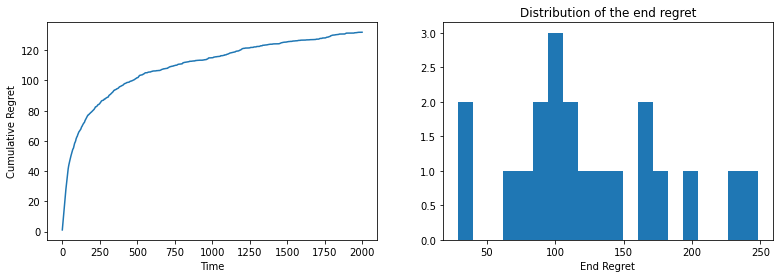

In [9]:
plt.figure(figsize=(13, 4))
plt.subplot(121)
plt.plot(cum_regret)
plt.xlabel("Time")
plt.ylabel("Cumulative Regret")

plt.subplot(122)
plt.hist(end_regrets, bins=20)
plt.title("Distribution of the end regret")
plt.xlabel("End Regret")
plt.show()